<a href="https://colab.research.google.com/github/bharatmee/Cat-Vs-Dog-Image-Classification/blob/main/Cat_Vs_Dog_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
!mkdir -p ~/.kaggle
!cp  kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [130]:
 !kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [131]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [132]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, BatchNormalization, Dropout

In [133]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))

validation_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [134]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds =validation_ds.map(process)

In [135]:
# create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding = 'valid') )

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding = 'valid') )

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding = 'valid') )

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [136]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [137]:
model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [138]:
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 86ms/step - accuracy: 0.5428 - loss: 3.2536 - val_accuracy: 0.5322 - val_loss: 0.7029
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.5983 - loss: 0.6459 - val_accuracy: 0.6158 - val_loss: 0.6725
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.6222 - loss: 0.6365 - val_accuracy: 0.6632 - val_loss: 0.6320
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.6275 - loss: 0.6890 - val_accuracy: 0.6452 - val_loss: 0.6278
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 89ms/step - accuracy: 0.6801 - loss: 0.5789 - val_accuracy: 0.7178 - val_loss: 0.5760
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 80ms/step - accuracy: 0.6848 - loss: 0.5475 - val_accuracy: 0.7536 - val_loss: 0.5067
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.6840 - loss: 0.5337 - val_accuracy: 0.7286 - val_loss: 0.6390
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6858 - loss: 0.5204 - 

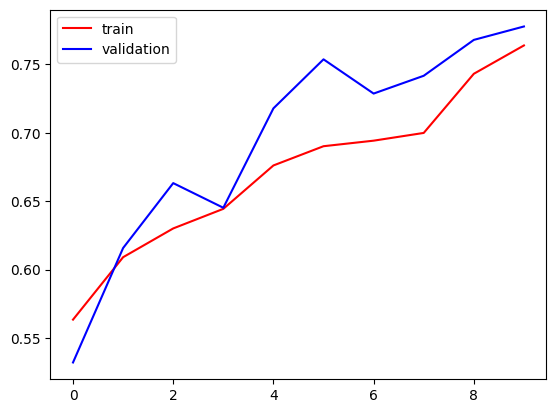

In [139]:
# before Dropout and BatchNormalization

import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],color = "red",label= "train")
plt.plot(history.history["val_accuracy"],color = "blue",label= "validation")
plt.legend()
plt.show()

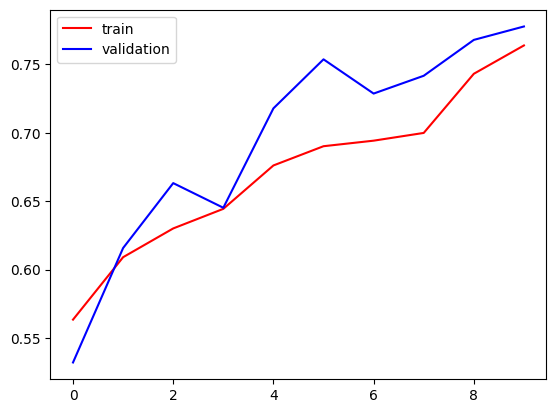

In [140]:
# After Dropout and BatchNormalization
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],color = "red",label= "train")
plt.plot(history.history["val_accuracy"],color = "blue",label= "validation")
plt.legend()
plt.show()

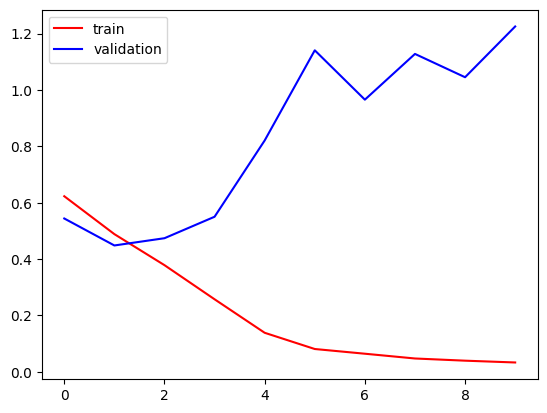

In [19]:
# before Dropout and BatchNormalization
import matplotlib.pyplot as plt

plt.plot(history.history["loss"],color = "red",label= "train")
plt.plot(history.history["val_loss"],color = "blue",label= "validation")
plt.legend()
plt.show()

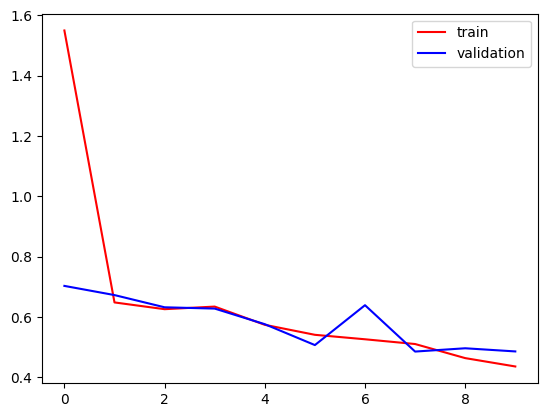

In [141]:
# After Dropout and BatchNormalization
import matplotlib.pyplot as plt

plt.plot(history.history["loss"],color = "red",label= "train")
plt.plot(history.history["val_loss"],color = "blue",label= "validation")
plt.legend()
plt.show()

In [142]:
# ways to reduce overfitting

# Add more data
# Data Augumentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce Complexity

In [143]:
import cv2

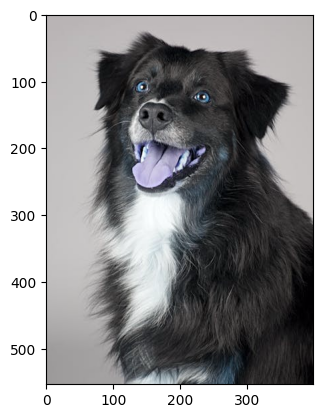

In [144]:
test_img = cv2.imread("/content/dog1.jpeg")
plt.imshow(test_img)

In [145]:
test_img.shape

(554, 400, 3)

In [146]:
test_img = cv2.resize(test_img, (256,256))


In [147]:
test_input = test_img.reshape((1,256,256,3))

In [148]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


array([[1.]], dtype=float32)

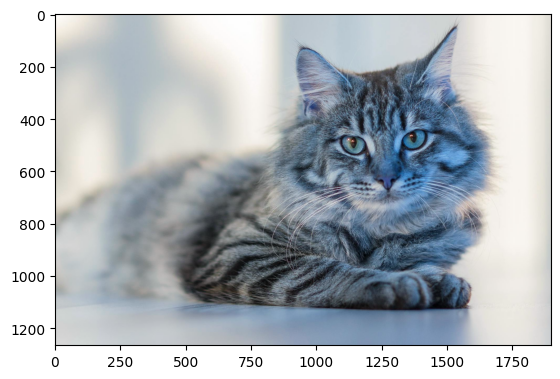

In [149]:
test_img = cv2.imread("/content/cat1.jpg")
plt.imshow(test_img)

In [150]:
test_img.shape

(1266, 1898, 3)

In [151]:
test_img = cv2.resize(test_img, (256,256))

In [152]:
test_input = test_img.reshape((1,256,256,3))

In [153]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.]], dtype=float32)